In [2]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from mlxtend.plotting import scatterplotmatrix
import numpy as np
from mlxtend.plotting import heatmap
from PIL import Image
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import nltk
from textblob import TextBlob
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelEncoder

nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [3]:
#pull the data
df = pd.read_csv('rest_review_data_cleaned.csv')

In [4]:
d f.head()

,Review,Liked,Review_cleaned
0,Wow... Loved this place.,1,"['wow', 'loved', 'place']"
1,Crust is not good.,0,"['crust', 'good']"
2,Not tasty and the texture was just nasty.,0,"['tasty', 'texture', 'nasty']"
3,Stopped by during the late May bank holiday of...,1,"['stopped', 'late', 'may', 'bank', 'holiday', ..."
4,The selection on the menu was great and so wer...,1,"['selection', 'menu', 'great', 'price']"


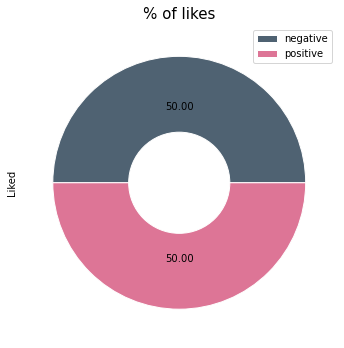

In [5]:
#Donut chart
colors = ['#4F6272', '#DD7596']
fig, (ax1) = plt.subplots(ncols=1, figsize=(10, 5))
df.Liked.value_counts().head(3).plot(kind='pie', labels=None, autopct='%.2f', ax=ax1, wedgeprops = { 'linewidth' : 1, 'edgecolor' : 'white' }, colors=colors).legend(labels={
                     "positive",
                     "negative"})
central_circle = plt.Circle((0, 0), 0.4, color='white')
fig = plt.gcf()
fig.gca().add_artist(central_circle)
plt.rc('font', size=12)
plt.title('% of likes', size=15)
plt.tight_layout()
plt.savefig('images/donut_chart.png', dpi=300)
plt.show()

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   Review          1000 non-null   object
 1   Liked           1000 non-null   int64 
 2   Review_cleaned  1000 non-null   object
dtypes: int64(1), object(2)
memory usage: 23.6+ KB


In [7]:
df.isnull().sum()

Review            0
Liked             0
Review_cleaned    0
dtype: int64

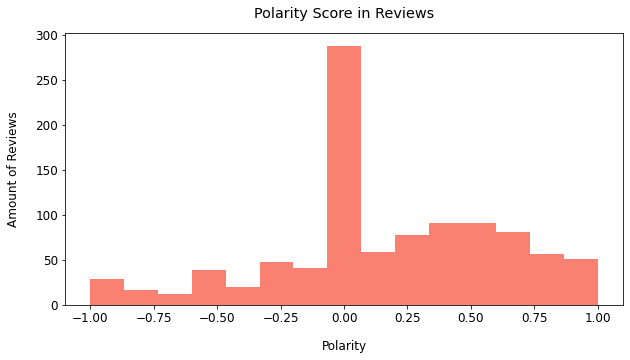

In [8]:
#Polarity scores
df["Polarity"] = df["Review_cleaned"].map(lambda Text: TextBlob(Text).sentiment.polarity)
df["Polarity"].plot(kind = "hist", bins = 15, linewidth = 1, color = "salmon", figsize = (10,5))

plt.title("Polarity Score in Reviews", pad = 15)
plt.xlabel("Polarity", labelpad = 15)

plt.ylabel("Amount of Reviews", labelpad = 15)
plt.savefig('images/polarity_score.png', dpi=300)
plt.show()

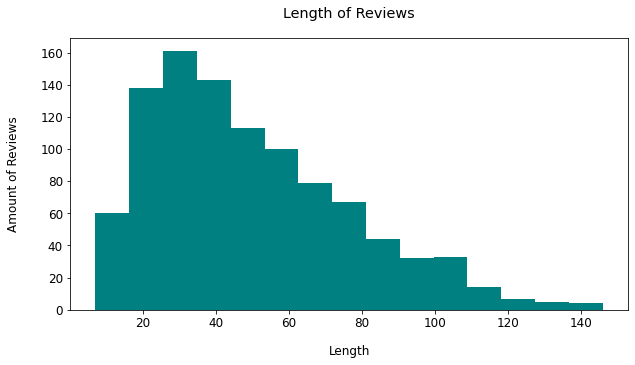

In [9]:
#Length of reviews
df["Length"] = df["Review_cleaned"].apply(lambda x: len(x) - x.count(" "))
df["Length"].plot(kind = "hist", bins = 15, linewidth = 1, color = "teal", figsize = (10,5))
plt.title("Length of Reviews", pad = 20)
plt.xlabel("Length", labelpad = 15)
plt.ylabel("Amount of Reviews",labelpad = 20)
plt.savefig('images/length_of_reviews.png', dpi=300)
plt.show()

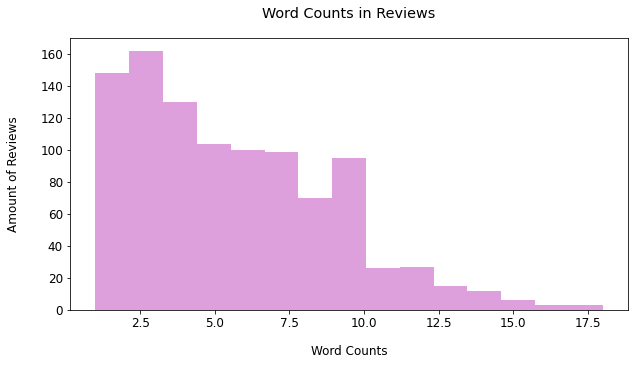

In [10]:
#Word counts
df["Word Counts"] = df["Review_cleaned"].apply(lambda x: len(str(x).split()))
df["Word Counts"].plot(kind = "hist", bins = 15, linewidth = 1, color = "plum", figsize = (10,5))
plt.title("Word Counts in Reviews", pad = 20)
plt.xlabel("Word Counts", labelpad = 15)
plt.ylabel("Amount of Reviews", labelpad = 20)
plt.savefig('images/word_counts.png', dpi=300)
plt.show()

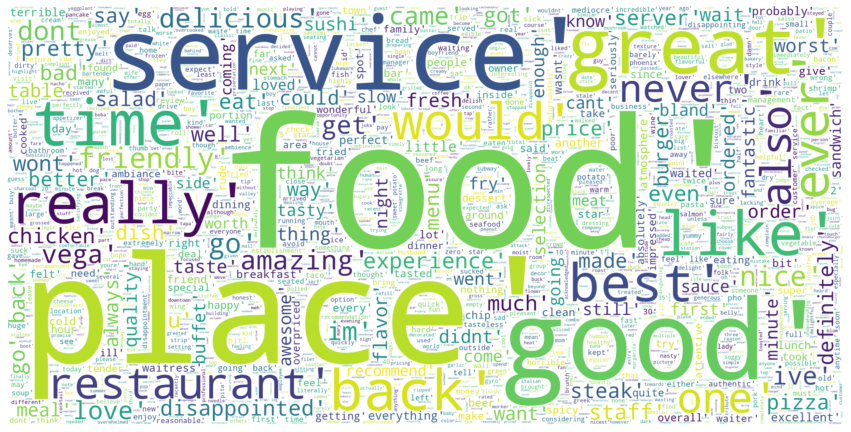

In [11]:
#WordCloud
Stopwords = set(nltk.corpus.stopwords.words("english")) - set(["not"])
wc= WordCloud(background_color="white",random_state=1, max_words=2000, width = 3000, height = 1500, stopwords = Stopwords).generate(' '.join(df['Review_cleaned']))
plt.figure(figsize = (15, 15))
plt.imshow(wc, interpolation = "bilinear")
plt.axis("off")
plt.savefig('images/wordcloud.png', dpi=300)
plt.show()

In [12]:
#N-Gram Analysis
def Gram_Analysis(Corpus, Gram, N):
    
  # Vectorizer
  Vectorizer = CountVectorizer(stop_words = Stopwords, ngram_range=(Gram,Gram))

  # N-Grams Matrix
  ngrams = Vectorizer.fit_transform(Corpus)

  # N-Grams Frequency
  Count = ngrams.sum(axis=0)

  # List of Words
  words = [(word, Count[0, idx]) for word, idx in Vectorizer.vocabulary_.items()]

  # Sort Descending With Key = Count
  words = sorted(words, key = lambda x:x[1], reverse = True)
    
  return words[:N]

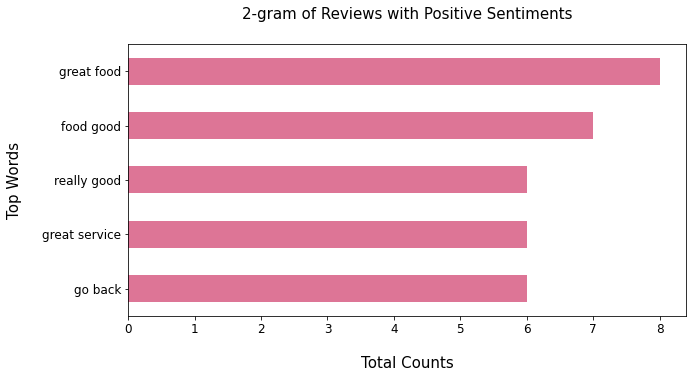

In [13]:
#2-grams
# Finding 2-gram
df_positive = df[df["Liked"] == 1].dropna()

words_p = Gram_Analysis(df_positive["Review_cleaned"], 2, 5)
Bigram = pd.DataFrame(words_p, columns = ["Words", "Counts"])

# Visualization
color_p=['#DD7596']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_p, figsize = (10, 5))
plt.title("2-gram of Reviews with Positive Sentiments", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Total Counts", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", fontsize = 15, labelpad = 20)
plt.savefig('images/p_2gram.png', dpi=300)
plt.show()

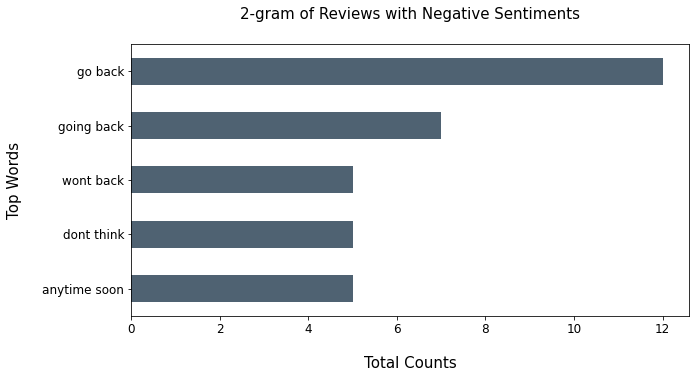

In [14]:
# Finding 2-gram
df_negative = df[df["Liked"] == 0].dropna()
words_n = Gram_Analysis(df_negative["Review_cleaned"], 2, 5)
Bigram = pd.DataFrame(words_n, columns = ["Words", "Counts"])

# Visualization
color_n = ['#4F6272']
Bigram.groupby("Words").sum()["Counts"].sort_values().plot(kind = "barh", color = color_n, figsize = (10, 5))
plt.title("2-gram of Reviews with Negative Sentiments", loc = "center", fontsize = 15, pad = 25)
plt.xlabel("Total Counts", fontsize = 15, labelpad = 20)
plt.xticks(rotation = 0)
plt.ylabel("Top Words", fontsize = 15, labelpad = 20)
plt.savefig('images/n_2gram.png', dpi=300)
plt.show()

In [16]:
df.to_csv('rest_review_data_cleaned.csv', index=False)